In [1]:
library(tidyverse)
library(lubridate)
library(dplyr)
library(ggplot2)
library(tidyr)
library(skimr)
library(janitor)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union



Attaching package: ‘janitor’


The following objects are masked from ‘package:stats’:

    chisq.test, fisher.test




*Importing csv dataset*

In [2]:
daily_activity <- read.csv(file = "../input/fitbit/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv")
daily_sleep <- read.csv(file = "../input/fitbit/Fitabase Data 4.12.16-5.12.16/sleepDay_merged.csv")
daily_steps <- read.csv(file= "../input/fitbit/Fitabase Data 4.12.16-5.12.16/dailySteps_merged.csv")
daily_intensity <- read.csv(file ="../input/fitbit/Fitabase Data 4.12.16-5.12.16/dailyIntensities_merged.csv")
weightlog <- read.csv(file = "../input/fitbit/Fitabase Data 4.12.16-5.12.16/weightLogInfo_merged.csv")
hourly_steps <- read.csv(file = "../input/fitbit/Fitabase Data 4.12.16-5.12.16/hourlySteps_merged.csv")

*Preview Dataset*

I used the following fuctions to preview the dataset to look for any inconsistencies and wrong data types.
We will avoid using daily intensity file because daily activity has more information and exact data from the intensity file. I made sure by running the function average and found identical averages on excel.
* str()
* head()


In [3]:
str(daily_activity)
str(daily_sleep)
head(daily_steps)
head(weightlog)
head(hourly_steps)

'data.frame':	940 obs. of  15 variables:
 $ Id                      : num  1.5e+09 1.5e+09 1.5e+09 1.5e+09 1.5e+09 ...
 $ ActivityDate            : chr  "4/12/2016" "4/13/2016" "4/14/2016" "4/15/2016" ...
 $ TotalSteps              : int  13162 10735 10460 9762 12669 9705 13019 15506 10544 9819 ...
 $ TotalDistance           : num  8.5 6.97 6.74 6.28 8.16 ...
 $ TrackerDistance         : num  8.5 6.97 6.74 6.28 8.16 ...
 $ LoggedActivitiesDistance: num  0 0 0 0 0 0 0 0 0 0 ...
 $ VeryActiveDistance      : num  1.88 1.57 2.44 2.14 2.71 ...
 $ ModeratelyActiveDistance: num  0.55 0.69 0.4 1.26 0.41 ...
 $ LightActiveDistance     : num  6.06 4.71 3.91 2.83 5.04 ...
 $ SedentaryActiveDistance : num  0 0 0 0 0 0 0 0 0 0 ...
 $ VeryActiveMinutes       : int  25 21 30 29 36 38 42 50 28 19 ...
 $ FairlyActiveMinutes     : int  13 19 11 34 10 20 16 31 12 8 ...
 $ LightlyActiveMinutes    : int  328 217 181 209 221 164 233 264 205 211 ...
 $ SedentaryMinutes        : int  728 776 1218 726 773 539 

,Id,ActivityDay,StepTotal
,<dbl>,<chr>,<int>
1,1503960366,4/12/2016,13162
2,1503960366,4/13/2016,10735
3,1503960366,4/14/2016,10460
4,1503960366,4/15/2016,9762
5,1503960366,4/16/2016,12669
6,1503960366,4/17/2016,9705


,Id,Date,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId
,<dbl>,<chr>,<dbl>,<dbl>,<int>,<dbl>,<chr>,<dbl>
1,1503960366,5/2/2016 11:59:59 PM,52.6,115.9631,22,22.65,True,1.462234e+12
2,1503960366,5/3/2016 11:59:59 PM,52.6,115.9631,NA,22.65,True,1.462320e+12
3,1927972279,4/13/2016 1:08:52 AM,133.5,294.3171,NA,47.54,False,1.460510e+12
4,2873212765,4/21/2016 11:59:59 PM,56.7,125.0021,NA,21.45,True,1.461283e+12
5,2873212765,5/12/2016 11:59:59 PM,57.3,126.3249,NA,21.69,True,1.463098e+12
6,4319703577,4/17/2016 11:59:59 PM,72.4,159.6147,25,27.45,True,1.460938e+12


,Id,ActivityHour,StepTotal
,<dbl>,<chr>,<int>
1,1503960366,4/12/2016 12:00:00 AM,373
2,1503960366,4/12/2016 1:00:00 AM,160
3,1503960366,4/12/2016 2:00:00 AM,151
4,1503960366,4/12/2016 3:00:00 AM,0
5,1503960366,4/12/2016 4:00:00 AM,0
6,1503960366,4/12/2016 5:00:00 AM,0


Finding how many unique users for each data set. There are only 8 unique user id from the weightLog dataset which is too small of a sample size to use.

In [4]:
n_distinct(data.frame(daily_activity$Id))

n_distinct(data.frame(daily_sleep$Id))

n_distinct(data.frame(daily_steps$Id))

n_distinct(data.frame(weightlog$Id))

n_distinct(data.frame(hourly_steps$Id))

[1] 33

[1] 24

[1] 33

[1] 8

[1] 33

Changing column names to lower case and making sure they are unique & consistent will help  avoid any unwanted error when we merge all the data.

In [5]:
activity <- clean_names(daily_activity)
sleep <- clean_names(daily_sleep)
steps <- clean_names(daily_steps)
hourlysteps <- clean_names(hourly_steps)

In [6]:
hourly_steps_1 <- hourlysteps %>%
separate(activity_hour, c("data", "time"), sep= ' ')
str(hourly_steps_1)

Warning message:
“Expected 2 pieces. Additional pieces discarded in 22099 rows [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, ...].”


'data.frame':	22099 obs. of  4 variables:
 $ id        : num  1.5e+09 1.5e+09 1.5e+09 1.5e+09 1.5e+09 ...
 $ data      : chr  "4/12/2016" "4/12/2016" "4/12/2016" "4/12/2016" ...
 $ time      : chr  "12:00:00" "1:00:00" "2:00:00" "3:00:00" ...
 $ step_total: int  373 160 151 0 0 0 0 0 250 1864 ...


*Fixing the data type and data format*

The activitydate, sleep day, and date are all listed as a character instead of date/time.

In [7]:
activity$activity_date=as.POSIXct(activity$activity_date, format="%m/%d/%Y", tz=Sys.timezone())
activity$date <- format(activity$activity_date, format = "%m/%d/%y")

sleep$sleep_day = as.POSIXct(sleep$sleep_day, format="%m/%d/%Y %I:%M:%S %p", tz=Sys.timezone())
sleep$date <- format(sleep$sleep_day, format = "%m/%d/%y")

steps$activity_day = as.POSIXct(steps$activity_day, format ="%m/%d/%Y", tz=Sys.timezone())
steps$date <- format(steps$activity_day, format = "%m/%d/%y")


Removing any NA values from the dataset.

In [8]:
activity <- activity %>%
distinct() %>%
drop_na()

sleep <- sleep %>%
distinct() %>%
drop_na()

steps <- steps %>%
distinct() %>%
drop_na()


In [9]:
head(activity)
head(sleep)
head(steps)
head(hourly_steps_1)

,id,activity_date,total_steps,total_distance,tracker_distance,logged_activities_distance,very_active_distance,moderately_active_distance,light_active_distance,sedentary_active_distance,very_active_minutes,fairly_active_minutes,lightly_active_minutes,sedentary_minutes,calories,date
,<dbl>,<dttm>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<chr>
1,1503960366,2016-04-12,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985,04/12/16
2,1503960366,2016-04-13,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797,04/13/16
3,1503960366,2016-04-14,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776,04/14/16
4,1503960366,2016-04-15,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745,04/15/16
5,1503960366,2016-04-16,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863,04/16/16
6,1503960366,2016-04-17,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728,04/17/16


,id,sleep_day,total_sleep_records,total_minutes_asleep,total_time_in_bed,date
,<dbl>,<dttm>,<int>,<int>,<int>,<chr>
1,1503960366,2016-04-12,1,327,346,04/12/16
2,1503960366,2016-04-13,2,384,407,04/13/16
3,1503960366,2016-04-15,1,412,442,04/15/16
4,1503960366,2016-04-16,2,340,367,04/16/16
5,1503960366,2016-04-17,1,700,712,04/17/16
6,1503960366,2016-04-19,1,304,320,04/19/16


,id,activity_day,step_total,date
,<dbl>,<dttm>,<int>,<chr>
1,1503960366,2016-04-12,13162,04/12/16
2,1503960366,2016-04-13,10735,04/13/16
3,1503960366,2016-04-14,10460,04/14/16
4,1503960366,2016-04-15,9762,04/15/16
5,1503960366,2016-04-16,12669,04/16/16
6,1503960366,2016-04-17,9705,04/17/16


,id,data,time,step_total
,<dbl>,<chr>,<chr>,<int>
1,1503960366,4/12/2016,12:00:00,373
2,1503960366,4/12/2016,1:00:00,160
3,1503960366,4/12/2016,2:00:00,151
4,1503960366,4/12/2016,3:00:00,0
5,1503960366,4/12/2016,4:00:00,0
6,1503960366,4/12/2016,5:00:00,0


Merging the Data the dataset with primary key ("id" & "date") for sleep & activity dataset

In [10]:
combined_data <- merge(sleep, activity, by=c('id', 'date'))


In [11]:
str(combined_data)


'data.frame':	410 obs. of  20 variables:
 $ id                        : num  1.5e+09 1.5e+09 1.5e+09 1.5e+09 1.5e+09 ...
 $ date                      : chr  "04/12/16" "04/13/16" "04/15/16" "04/16/16" ...
 $ sleep_day                 : POSIXct, format: "2016-04-12" "2016-04-13" ...
 $ total_sleep_records       : int  1 2 1 2 1 1 1 1 1 1 ...
 $ total_minutes_asleep      : int  327 384 412 340 700 304 360 325 361 430 ...
 $ total_time_in_bed         : int  346 407 442 367 712 320 377 364 384 449 ...
 $ activity_date             : POSIXct, format: "2016-04-12" "2016-04-13" ...
 $ total_steps               : int  13162 10735 9762 12669 9705 15506 10544 9819 14371 10039 ...
 $ total_distance            : num  8.5 6.97 6.28 8.16 6.48 ...
 $ tracker_distance          : num  8.5 6.97 6.28 8.16 6.48 ...
 $ logged_activities_distance: num  0 0 0 0 0 0 0 0 0 0 ...
 $ very_active_distance      : num  1.88 1.57 2.14 2.71 3.19 ...
 $ moderately_active_distance: num  0.55 0.69 1.26 0.41 0.78 ...
 $ l

# Analyze

We will be analyzing the data to look for patterns, relationships, and trends that could present insightful marketing strategies for Leaf (wellness tracker)

*We will be analyzing the effects of*

1. The total time you are in bed vs the total minutes asleep.
2. The total steps vs calories burned


`geom_smooth()` using method = 'loess' and formula 'y ~ x'



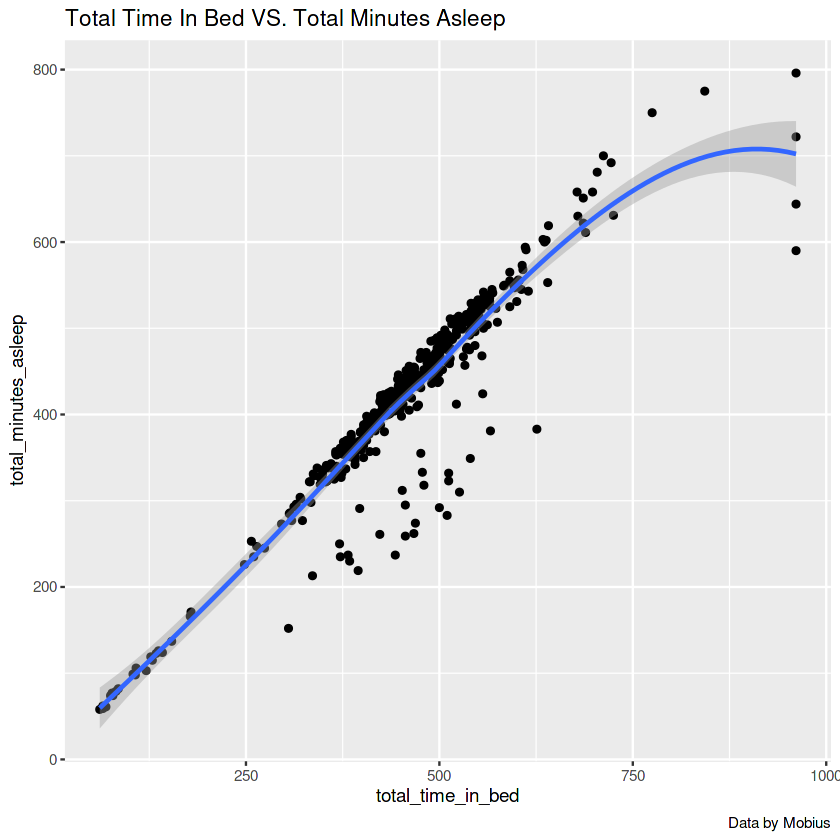

In [12]:
ggplot(data= combined_data, aes(x=total_time_in_bed, y=total_minutes_asleep))+ geom_point() + geom_smooth() + labs(title = "Total Time In Bed VS. Total Minutes Asleep", caption = "Data by Mobius")

There is a strong positive correlation between total time in bed and total minutes asleep which makes them move either up or down in the same direction together. More time in bed does not cause more time asleep.

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



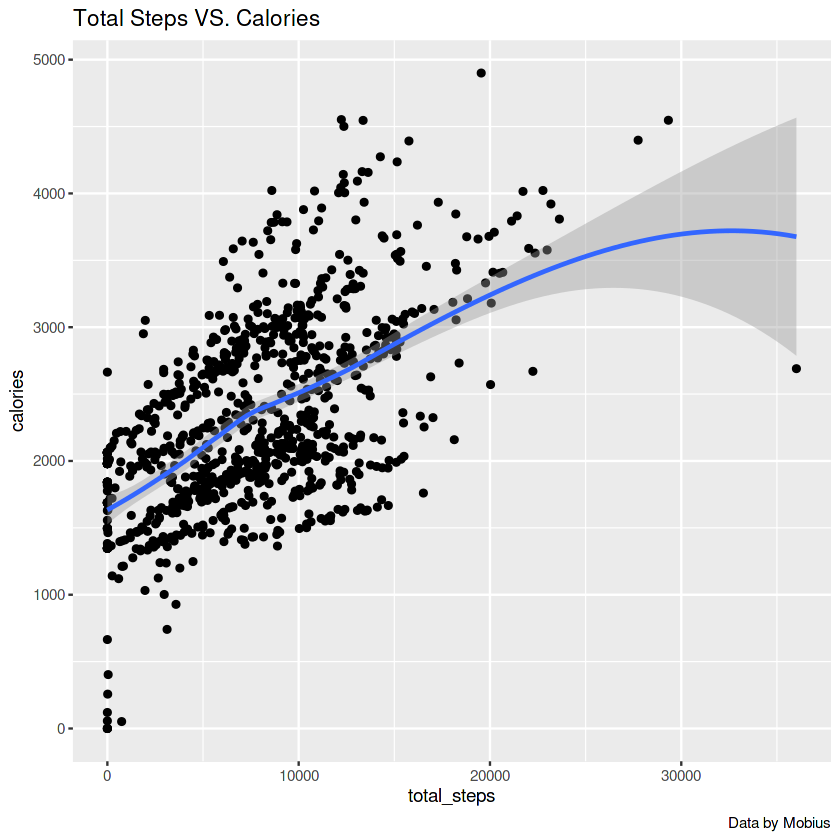

In [13]:
ggplot(data= activity, aes(x=total_steps, y=calories)) +geom_point() + geom_smooth() + labs(title = "Total Steps VS. Calories", caption = "Data by Mobius")

In [14]:
mean(activity$total_steps)

[1] 7637.911

In [15]:
max(activity$total_steps)

[1] 36019

There is also a positive correlation between total steps and calories. The data shows most users stop around 7,638 steps. The marketing team could send out notifications on how many users went pass 7,638 steps. Not only will this motivate more users to go beyond their limits, there will be more calories burned to achieve their goal quicker.  Keeping in mind, more steps does not mean more calories burned. Larger people or more muscular requires more calories for activity, maintaining weight or muscle.

# Act

Again the goal of this business task is to find out how Bellabeat's devices and the app can help gain insight into how people are using their smart devices and we as an Analyst report the findings to the marketing team.
Here are the findings.

Firstly, the datasets are particular small sample sizes that cannot really determine a feasible results. Adding on, there seems to be no data on what particular female group that is being in the case study. For example, the age, demographics, etc which can be a selection bias. I recommend Bellabeats to conduct another analysis in the future with more data.




* The average steps for 30 participants are about 7,638 steps per day in the span of a month of data. The recommended number of steps to reduce stroke and heart disease is 10,000 steps per day. Bellabeat can send out notifications to help achieve greater steps reached to increase calories burned.

* We found there is a strong positive correlation between number of hours sleep and time on the bed. Bellabeats could arrange a sleep schedule to help achieve at least 7 hours of sleep to obtain optimal recovery time. For those who are having trouble sleeping, they can offer stretching and breathing classes that could be used for achieving an ideal sleep and reduce sedentary lifestyle.

* Lastly, nutrition intake is the most important part of a healthy lifestyle. Bellabeats should expand on their app to include meal plans and recommendations and how much to consume. It is also a great way for them to track more data and use for further analysis.
